In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Generate an array of distinct colors with a specified length
def generate_distinct_colors(num_colors):
    # Create a color map from the 'tab20' colormap in Matplotlib
    cmap = plt.get_cmap('tab20')
    
    # Get a range of colors from the colormap
    colors = [cmap(i) for i in np.linspace(0, 1, num_colors)]
    
    return colors

def plot_mean_curve_with_error_bars(num_seeds, env_name, algorithm_name, num_iteration, is_warm_start, color):
    # Initialize lists to store interpolated data for each seed
    interp_seeds = []
    seed_x_values = []

    for seed in range(1, num_seeds + 1):
        # Generate filenames based on the provided format
        
        data_filename = f"{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_exps.npy"
        x_filename = f"{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_infostates.npy"
        
        # Load data for each seed and its corresponding x-values
        seed_data = np.load(data_filename)
        x_values = np.load(x_filename)
        
        interp = interp1d(x_values, seed_data, kind='cubic')
        interp_seeds.append(interp)
        seed_x_values.append(x_values)

    # Find the minimum and maximum x-values across all seeds
    min_x = min([np.min(x) for x in seed_x_values])
    max_x = max([np.max(x) for x in seed_x_values])

    # Generate a sequence of x-values from min_x to max_x
    x_sequence = np.linspace(min_x, max_x, num=1000)  # You can adjust the num parameter for the desired number of points

    # Initialize arrays to store mean and standard deviation
    mean_data = np.zeros(len(x_sequence))
    std_dev_data = np.zeros(len(x_sequence))

    # Calculate the mean and standard deviation at each x-value
    for i, x in enumerate(x_sequence):
        values_at_x = [interp(x) for interp in interp_seeds]
        mean_data[i] = np.mean(values_at_x)
        std_dev_data[i] = np.std(values_at_x)

    # Plot the curve with error bars
    plt.plot(x_sequence, mean_data, label=f'{algorithm_name}_{num_iteration}_ws{is_warm_start}', color=color)
    plt.fill_between(x_sequence, mean_data - std_dev_data, mean_data + std_dev_data, alpha=0.3, color=color)
    plt.xlabel('# of Information states visited')
    plt.ylabel('Exploitability')
    plt.title(f'{env_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

colors = generate_distinct_colors(50)

# Example usage:
i = 0
num_seeds = 100  # Replace with the actual number of seeds
env_name = "your_env_name"  # Replace with your environment name
algorithm_name = "your_algorithm_name"  # Replace with your algorithm name
num_iteration = 1000  # Replace with the number of iterations
is_warm_start = True  # Replace with True or False as needed
plot_mean_curve_with_error_bars(num_seeds, env_name, algorithm_name, num_iteration, is_warm_start, colors[i])


ModuleNotFoundError: No module named 'scipy'

In [6]:
import numpy as np
import matplotlib.pyplot as plt
save_prefix = "/root/data/results"

def plot_curves_exact(env_name, algorithm_name, num_iteration, is_warm_start, seed=0):
    
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    # '/root/data/results/' + self.algorithm + str(self.meta_iterations) + '_' + self.game_name + f'_{seed}'
    data_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_exps.npy"
    x_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_infostates.npy"

    seed_data = np.load(data_filename)
    x_values = np.load(x_filename)

    selected_inds = x_values < 1e8

    plt.plot(x_values[selected_inds], seed_data[selected_inds], label=f'{algorithm_name}_{num_iteration}_ws{is_warm_start}')

def plot_baselines(env_name, algorithm_name, seed=0):
    # lcfr_liars_dice_0__exps.npy
    
    data_filename = f"{save_prefix}/{algorithm_name}_{env_name}_{seed}__exps.npy"
    x_filename = f"{save_prefix}/{algorithm_name}_{env_name}_{seed}__infostates.npy"

    seed_data = np.load(data_filename)
    x_values = np.load(x_filename)

    selected_inds = x_values < 1e8

    plt.plot(x_values[selected_inds], seed_data[selected_inds], label=f'{algorithm_name}')



EXP plotting

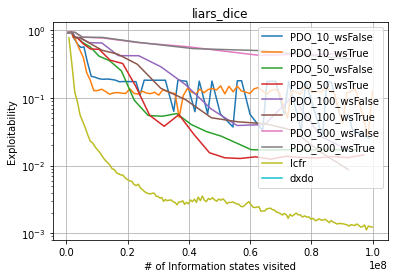

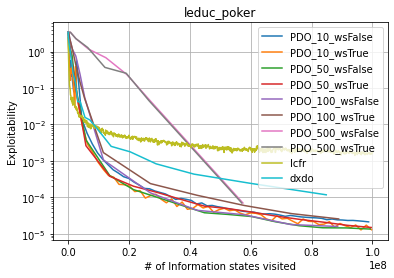

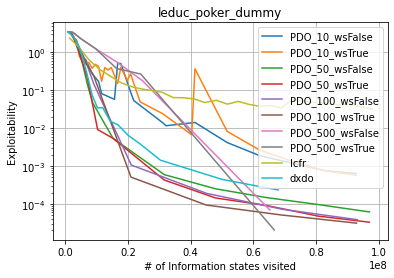

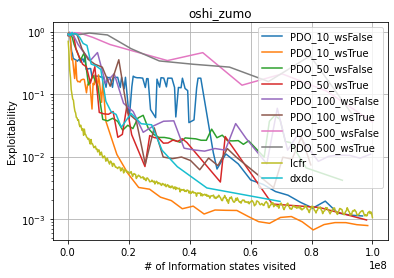

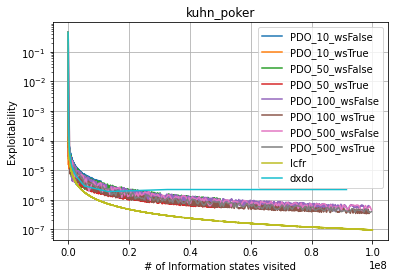

In [7]:
# Example usage:
num_seeds = 100  # Replace with the actual number of seeds
env_name = "your_env_name"  # Replace with your environment name
algorithm_name = "your_algorithm_name"  # Replace with your algorithm name
num_iteration = 1000  # Replace with the number of iterations
is_warm_start = True  # Replace with True or False as needed


for env_name in ["liars_dice", "leduc_poker", "leduc_poker_dummy", "oshi_zumo", "kuhn_poker"]:
    plt.cla()
    for algorithm_name in ["PDO"]:
        for num_iteration in [10, 50, 100, 500]:
            plot_curves_exact(env_name, algorithm_name, num_iteration, is_warm_start=False)
            plot_curves_exact(env_name, algorithm_name, num_iteration, is_warm_start=True)
#             get_support(env_name, algorithm_name, num_iteration, is_warm_start=False)
    
    plot_baselines(env_name, "lcfr")
    plot_baselines(env_name, "dxdo")
    
    plt.yscale("log")
    plt.xlabel('# of Information states visited')
    plt.ylabel('Exploitability')
    plt.title(f'{env_name}')
    plt.legend()
    plt.grid(True)
    plt.show()


Support plotting

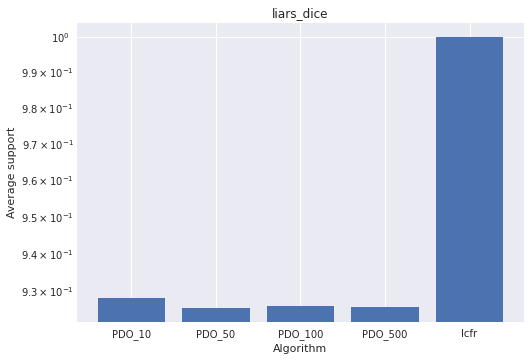

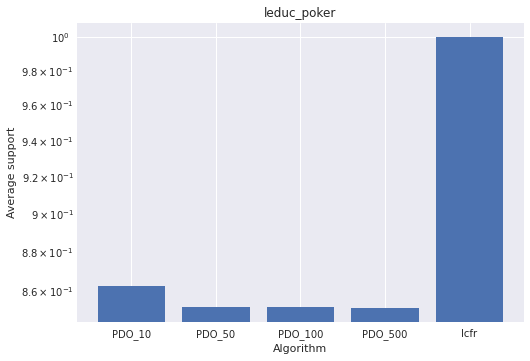

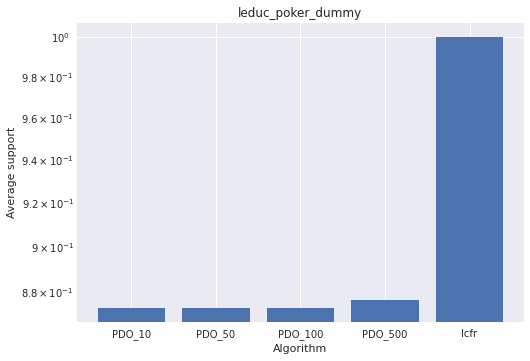

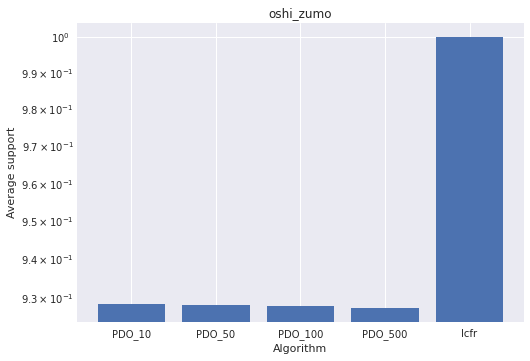

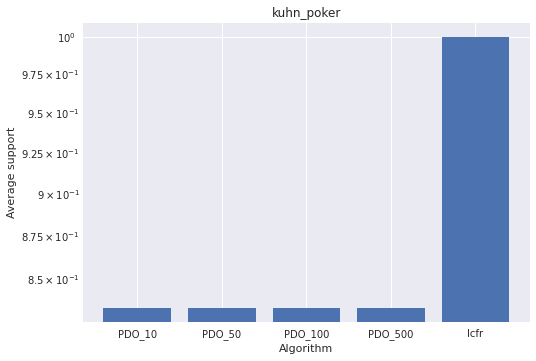

In [31]:
def get_support(env_name, algorithm_name, num_iteration, is_warm_start, seed=0):
    
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    data_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_infos.npy"
    return np.load(data_filename)[2]

def get_support_baselines(env_name, algorithm_name, seed=0):
    
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    data_filename = f"{save_prefix}/{algorithm_name}_{env_name}_{seed}__infos.npy"
    return np.load(data_filename)[0]

# Example usage:
num_seeds = 100  # Replace with the actual number of seeds
env_name = "your_env_name"  # Replace with your environment name
algorithm_name = "your_algorithm_name"  # Replace with your algorithm name
num_iteration = 1000  # Replace with the number of iterations
is_warm_start = True  # Replace with True or False as needed
plt.style.use("seaborn")

for env_name in ["liars_dice", "leduc_poker", "leduc_poker_dummy", "oshi_zumo", "kuhn_poker"]:
    plt.cla()
    supports = []
    names = []
    
    for algorithm_name in ["PDO"]:
        for num_iteration in [10, 50, 100, 500]:
#             plot_curves_exact(env_name, algorithm_name, num_iteration, is_warm_start=False)
#             plot_curves_exact(env_name, algorithm_name, num_iteration, is_warm_start=True)
            supports.append(get_support(env_name, algorithm_name, num_iteration, is_warm_start=False))
            names.append(f"{algorithm_name}_{num_iteration}")
    
    supports.append(get_support_baselines(env_name, "lcfr"))
    names.append(f"lcfr")
    
    plt.bar(names, supports)
    plt.yscale("log")
    plt.xlabel('Algorithm')
    plt.ylabel('Average support')
    plt.title(f'{env_name}')
    plt.show()


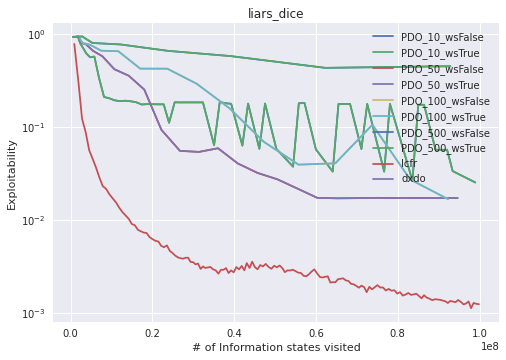

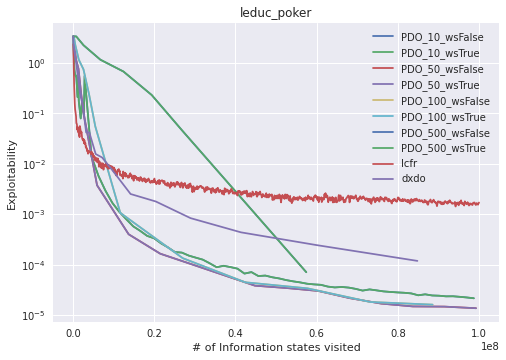

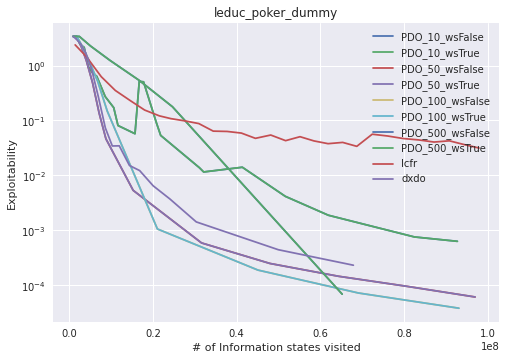

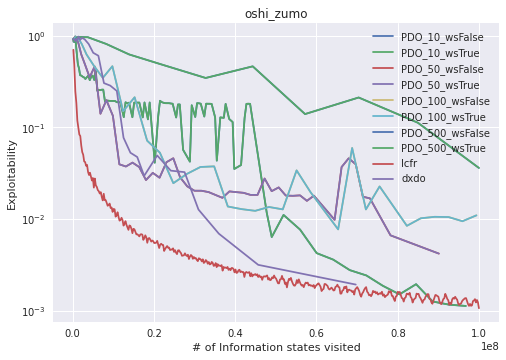

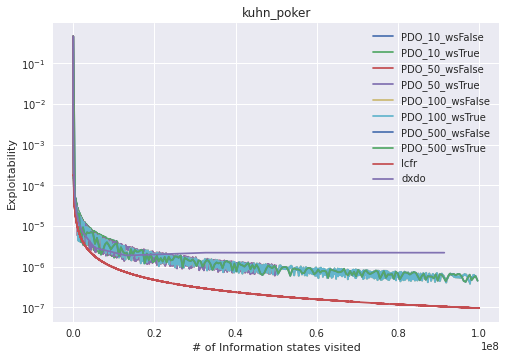

In [ ]:
def plot_curves_sto(env_name, algorithm_name, num_iteration, is_warm_start, seed=0):
    
    # kuhn_poker_PDO_100_wsFalse_0_exps.npy
    # '/root/data/results/' + self.algorithm + str(self.meta_iterations) + '_' + self.game_name + f'_{seed}'
    data_filename = f"{save_prefix}/{algorithm_name}{num_iteration}_ws{is_warm_start}_{seed}_exps.npy"
    x_filename = f"{save_prefix}/{env_name}_{algorithm_name}_{num_iteration}_ws{is_warm_start}_{seed}_infostates.npy"

    seed_data = np.load(data_filename)
    x_values = np.load(x_filename)

    selected_inds = x_values < 1e8

    plt.plot(x_values[selected_inds], seed_data[selected_inds], label=f'{algorithm_name}_{num_iteration}_ws{is_warm_start}')